In [21]:
import pycbc.noise
from pycbc.noise import noise_from_psd
import pycbc.psd
import pylab as plt
import pycbc.filter as pfliter
from pycbc.waveform import get_td_waveform
import random
import numpy as np
import cProfile

In [22]:
T = 4
flow = 30.0
delta_f = 1.0 / T
flen = int(2048 / delta_f) + 1
delta_t = 1.0 / 4096
tsamples = int(T / delta_t)

In [23]:
SNR_array_2 = []
random_scale = 2400

In [24]:
# PSD
psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)
noisesamples = int(4 / delta_t)

12 13
wvfrm = 
l =  0  SNR =  8.353350135053377  m1 =  12  m2 =  13
15 26
wvfrm = 
l =  1  SNR =  11.392161847875938  m1 =  15  m2 =  26
16 28
wvfrm = 
l =  2  SNR =  9.844069451649311  m1 =  16  m2 =  28
28 11
wvfrm = 
l =  3  SNR =  7.659254924218234  m1 =  28  m2 =  11
18 16
wvfrm = 
l =  4  SNR =  10.353621058922839  m1 =  18  m2 =  16
23 20
wvfrm = 
l =  5  SNR =  11.893456828372273  m1 =  23  m2 =  20
24 18
wvfrm = 
l =  6  SNR =  11.033644417576856  m1 =  24  m2 =  18
17 13
wvfrm = 
l =  7  SNR =  6.583466025311202  m1 =  17  m2 =  13
21 25
wvfrm = 
l =  8  SNR =  11.812929014323508  m1 =  21  m2 =  25
28 23
wvfrm = 
l =  9  SNR =  12.95363099869338  m1 =  28  m2 =  23
19 11
wvfrm = 
l =  10  SNR =  8.26666001549573  m1 =  19  m2 =  11
19 13
wvfrm = 
l =  11  SNR =  7.469387407199618  m1 =  19  m2 =  13
22 10
wvfrm = 
l =  12  SNR =  8.13016850444115  m1 =  22  m2 =  10
20 24
wvfrm = 
l =  13  SNR =  12.708599772993974  m1 =  20  m2 =  24
25 17
wvfrm = 
l =  14  SNR =  10.008054

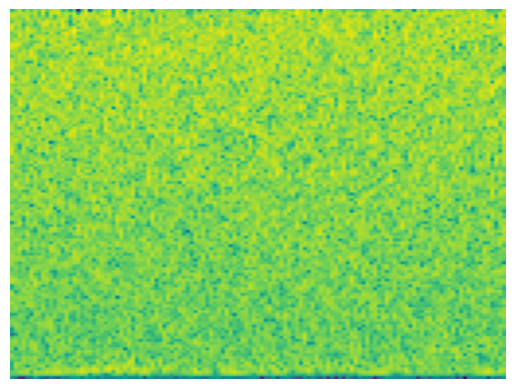

In [25]:
l = 0
while l < 100:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # rolling:

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 5000 + 6000 + 4500)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_2.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+6000+9500}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

27 20
wvfrm = 
l =  100  SNR =  9.89283873600042  m1 =  27  m2 =  20
22 10
wvfrm = 
l =  101  SNR =  10.875284330304671  m1 =  22  m2 =  10
29 21
wvfrm = 
l =  102  SNR =  11.554506356935793  m1 =  29  m2 =  21
25 16
wvfrm = 
l =  103  SNR =  9.510833383696744  m1 =  25  m2 =  16
28 18
wvfrm = 
l =  104  SNR =  12.299743372438089  m1 =  28  m2 =  18
24 10
wvfrm = 
l =  105  SNR =  8.412305669289669  m1 =  24  m2 =  10
11 17
wvfrm = 
l =  106  SNR =  9.696452565538518  m1 =  11  m2 =  17
10 20
wvfrm = 
l =  107  SNR =  6.521295967555328  m1 =  10  m2 =  20
22 11
wvfrm = 
l =  108  SNR =  8.939500663156503  m1 =  22  m2 =  11
13 21
wvfrm = 
l =  109  SNR =  9.002572206241213  m1 =  13  m2 =  21
18 18
wvfrm = 
l =  110  SNR =  10.746588848040364  m1 =  18  m2 =  18
14 13
wvfrm = 
l =  111  SNR =  10.2645738855929  m1 =  14  m2 =  13
26 12
wvfrm = 
l =  112  SNR =  9.36061672984388  m1 =  26  m2 =  12
17 24
wvfrm = 
l =  113  SNR =  10.416921419319937  m1 =  17  m2 =  24
28 29
wvfrm = 
l =

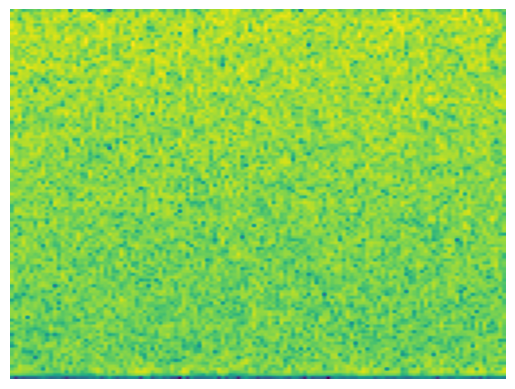

In [26]:
while l < 200:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 5000 + 6000 + 4500)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_2.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+6000+9500}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

12 27
wvfrm = 
l =  200  SNR =  9.13896688882448  m1 =  12  m2 =  27
24 20
wvfrm = 
l =  201  SNR =  11.701715743938442  m1 =  24  m2 =  20
23 11
wvfrm = 
l =  202  SNR =  9.795999068987406  m1 =  23  m2 =  11
10 29
wvfrm = 
l =  203  SNR =  9.754906839323557  m1 =  10  m2 =  29
16 16
wvfrm = 
l =  204  SNR =  9.6176775079439  m1 =  16  m2 =  16
22 27
wvfrm = 
l =  205  SNR =  12.711213384039837  m1 =  22  m2 =  27
25 18
wvfrm = 
l =  206  SNR =  11.334994071486381  m1 =  25  m2 =  18
10 28
wvfrm = 
l =  207  SNR =  9.78616423961025  m1 =  10  m2 =  28
16 11
wvfrm = 
l =  208  SNR =  7.239818168991523  m1 =  16  m2 =  11
30 15
wvfrm = 
l =  209  SNR =  11.269742992292528  m1 =  30  m2 =  15
14 20
wvfrm = 
l =  210  SNR =  7.789027096622342  m1 =  14  m2 =  20
17 16
wvfrm = 
l =  211  SNR =  10.067573607233552  m1 =  17  m2 =  16
20 11
wvfrm = 
l =  212  SNR =  8.476876703176428  m1 =  20  m2 =  11
14 26
wvfrm = 
l =  213  SNR =  9.97684395058501  m1 =  14  m2 =  26
23 28
wvfrm = 
l =  

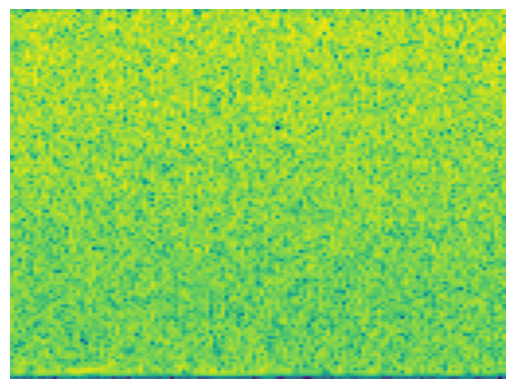

In [27]:
while l < 300:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 5000 + 6000 + 4500)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_2.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+6000+9500}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

28 26
wvfrm = 
l =  300  SNR =  14.118640810419024  m1 =  28  m2 =  26
13 19
wvfrm = 
l =  301  SNR =  8.359504661275956  m1 =  13  m2 =  19
15 16
wvfrm = 
l =  302  SNR =  9.357967724712566  m1 =  15  m2 =  16
16 29
wvfrm = 
l =  303  SNR =  11.04681367413164  m1 =  16  m2 =  29
13 19
wvfrm = 
l =  304  SNR =  8.451733083532629  m1 =  13  m2 =  19
17 20
wvfrm = 
l =  305  SNR =  10.81073515283048  m1 =  17  m2 =  20
13 19
wvfrm = 
l =  306  SNR =  7.6317049907236  m1 =  13  m2 =  19
24 24
wvfrm = 
l =  307  SNR =  13.570923154059871  m1 =  24  m2 =  24
26 21
wvfrm = 
l =  308  SNR =  12.013281835263564  m1 =  26  m2 =  21
25 16
wvfrm = 
l =  309  SNR =  8.6506234090134  m1 =  25  m2 =  16
20 11
wvfrm = 
l =  310  SNR =  8.50370457638212  m1 =  20  m2 =  11
16 15
wvfrm = 
l =  311  SNR =  10.37538466783677  m1 =  16  m2 =  15
14 23
wvfrm = 
l =  312  SNR =  7.523306199719235  m1 =  14  m2 =  23
19 15
wvfrm = 
l =  313  SNR =  10.838510502362302  m1 =  19  m2 =  15
12 25
wvfrm = 
l =  3

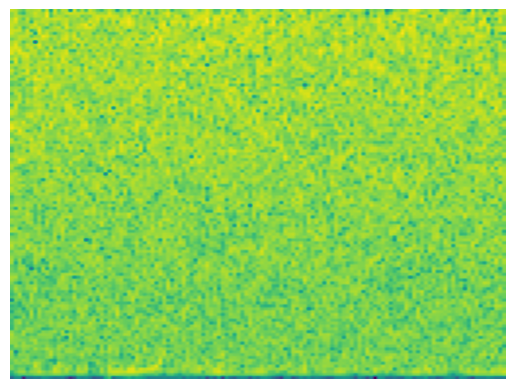

In [28]:
while l < 400:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 5000 + 6000 + 4500)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_2.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+6000+9500}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

29 15
wvfrm = 
l =  400  SNR =  9.703845435723926  m1 =  29  m2 =  15
28 22
wvfrm = 
l =  401  SNR =  12.203264226013633  m1 =  28  m2 =  22
24 26
wvfrm = 
l =  402  SNR =  13.13185840257868  m1 =  24  m2 =  26
28 23
wvfrm = 
l =  403  SNR =  14.234529564641162  m1 =  28  m2 =  23
25 25
wvfrm = 
l =  404  SNR =  12.487674996873253  m1 =  25  m2 =  25
10 24
wvfrm = 
l =  405  SNR =  9.138436189632142  m1 =  10  m2 =  24
26 16
wvfrm = 
l =  406  SNR =  11.349522983310594  m1 =  26  m2 =  16
27 25
wvfrm = 
l =  407  SNR =  12.818356683033478  m1 =  27  m2 =  25
30 12
wvfrm = 
l =  408  SNR =  8.628910794243069  m1 =  30  m2 =  12
10 16
wvfrm = 
l =  409  SNR =  7.98298319959416  m1 =  10  m2 =  16
14 22
wvfrm = 
l =  410  SNR =  9.534477481598229  m1 =  14  m2 =  22
29 26
wvfrm = 
l =  411  SNR =  14.830848805059745  m1 =  29  m2 =  26
27 29
wvfrm = 
l =  412  SNR =  15.184163781793282  m1 =  27  m2 =  29
14 29
wvfrm = 
l =  413  SNR =  9.089507305572463  m1 =  14  m2 =  29
26 19
wvfrm = 

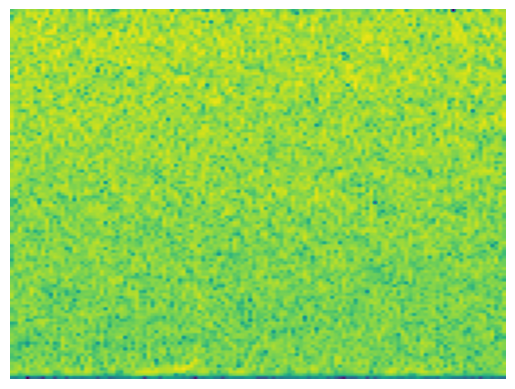

In [29]:
while l < 500:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 5000 + 6000 + 4500)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_2.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+6000+9500}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

In [30]:
while l < 500:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 5000 + 6000 + 4500)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_2.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+6000+9500}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

20 24
wvfrm = 
l =  500  SNR =  11.881956923257661  m1 =  20  m2 =  24
22 19
wvfrm = 
l =  501  SNR =  10.036622686524552  m1 =  22  m2 =  19
14 20
wvfrm = 
l =  502  SNR =  10.437664318287297  m1 =  14  m2 =  20
24 17
wvfrm = 
l =  503  SNR =  10.568803126415327  m1 =  24  m2 =  17
23 10
wvfrm = 
l =  504  SNR =  9.651689718799826  m1 =  23  m2 =  10
14 17
wvfrm = 
l =  505  SNR =  9.402537115144506  m1 =  14  m2 =  17
25 28
wvfrm = 
l =  506  SNR =  13.361504120403964  m1 =  25  m2 =  28
13 23
wvfrm = 
l =  507  SNR =  7.834616170383023  m1 =  13  m2 =  23
24 22
wvfrm = 
l =  508  SNR =  10.644343276344586  m1 =  24  m2 =  22
19 24
wvfrm = 
l =  509  SNR =  11.301192274559751  m1 =  19  m2 =  24
15 27
wvfrm = 
l =  510  SNR =  11.312286912794548  m1 =  15  m2 =  27
12 26
wvfrm = 
l =  511  SNR =  7.882845688734391  m1 =  12  m2 =  26
23 19
wvfrm = 
l =  512  SNR =  11.590852340100197  m1 =  23  m2 =  19
11 27
wvfrm = 
l =  513  SNR =  9.000344174538414  m1 =  11  m2 =  27
23 17
wvfrm

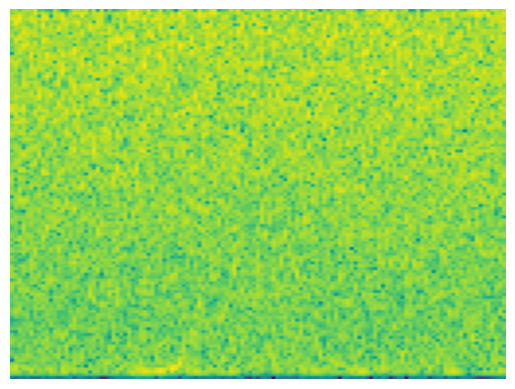

In [31]:
while l < 600:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 5000 + 6000 + 4500)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_2.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+6000+9500}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

18 22
wvfrm = 
l =  600  SNR =  11.908992758525633  m1 =  18  m2 =  22
28 21
wvfrm = 
l =  601  SNR =  11.311765059798521  m1 =  28  m2 =  21
13 15
wvfrm = 
l =  602  SNR =  10.171707722149534  m1 =  13  m2 =  15
23 26
wvfrm = 
l =  603  SNR =  13.166778730351771  m1 =  23  m2 =  26
12 22
wvfrm = 
l =  604  SNR =  9.687966601577543  m1 =  12  m2 =  22
27 30
wvfrm = 
l =  605  SNR =  15.137231480038245  m1 =  27  m2 =  30
10 28
wvfrm = 
l =  606  SNR =  7.253372848827647  m1 =  10  m2 =  28
11 16
wvfrm = 
l =  607  SNR =  7.239545640247667  m1 =  11  m2 =  16
20 15
wvfrm = 
l =  608  SNR =  10.906447880227397  m1 =  20  m2 =  15
22 10
wvfrm = 
l =  609  SNR =  8.505698600763187  m1 =  22  m2 =  10
10 29
wvfrm = 
l =  610  SNR =  8.787363862260879  m1 =  10  m2 =  29
27 18
wvfrm = 
l =  611  SNR =  11.520970710152303  m1 =  27  m2 =  18
26 28
wvfrm = 
l =  612  SNR =  12.843149989066099  m1 =  26  m2 =  28
22 13
wvfrm = 
l =  613  SNR =  10.813863395481132  m1 =  22  m2 =  13
11 24
wvfrm

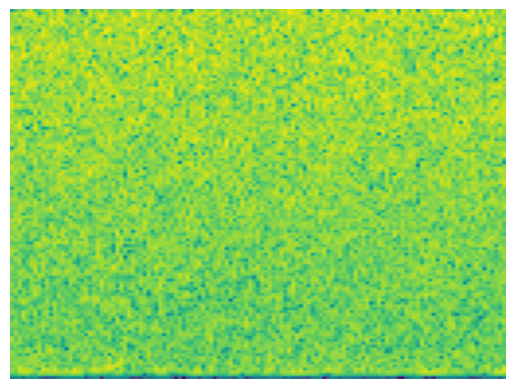

In [32]:
while l < 700:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 5000 + 6000 + 4500)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_2.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+6000+9500}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

29 29
wvfrm = 
l =  700  SNR =  13.117032887336869  m1 =  29  m2 =  29
13 16
wvfrm = 
l =  701  SNR =  8.997488394212771  m1 =  13  m2 =  16
25 23
wvfrm = 
l =  702  SNR =  13.391410466210449  m1 =  25  m2 =  23
21 12
wvfrm = 
l =  703  SNR =  8.471333852867065  m1 =  21  m2 =  12
14 20
wvfrm = 
l =  704  SNR =  9.700797310023964  m1 =  14  m2 =  20
16 13
wvfrm = 
l =  705  SNR =  7.373844019717896  m1 =  16  m2 =  13
10 30
wvfrm = 
l =  706  SNR =  8.698735844343224  m1 =  10  m2 =  30
15 14
wvfrm = 
l =  707  SNR =  7.725997220507114  m1 =  15  m2 =  14
23 25
wvfrm = 
l =  708  SNR =  14.259423879777472  m1 =  23  m2 =  25
12 10
wvfrm = 
l =  709  SNR =  7.865298590880739  m1 =  12  m2 =  10
21 13
wvfrm = 
l =  710  SNR =  8.172666565726884  m1 =  21  m2 =  13
28 11
wvfrm = 
l =  711  SNR =  9.221486149475831  m1 =  28  m2 =  11
26 25
wvfrm = 
l =  712  SNR =  12.372190105422913  m1 =  26  m2 =  25
19 14
wvfrm = 
l =  713  SNR =  8.355319364314342  m1 =  19  m2 =  14
30 24
wvfrm = 
l

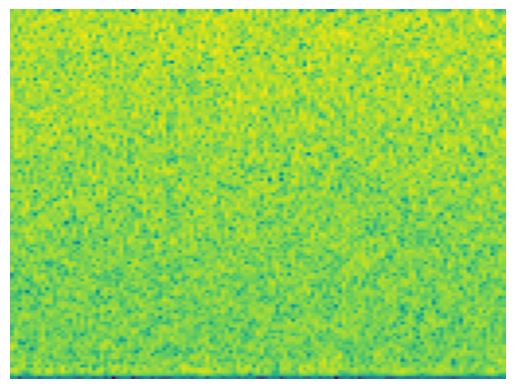

In [33]:
while l < 800:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 5000 + 6000 + 4500)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_2.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+6000+9500}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

11 29
wvfrm = 
l =  800  SNR =  9.08089000720869  m1 =  11  m2 =  29
12 19
wvfrm = 
l =  801  SNR =  7.735799008884847  m1 =  12  m2 =  19
13 22
wvfrm = 
l =  802  SNR =  10.157880731986225  m1 =  13  m2 =  22
16 26
wvfrm = 
l =  803  SNR =  10.325397031920241  m1 =  16  m2 =  26
29 21
wvfrm = 
l =  804  SNR =  11.129064710695904  m1 =  29  m2 =  21
24 15
wvfrm = 
l =  805  SNR =  9.711145457349737  m1 =  24  m2 =  15
24 23
wvfrm = 
l =  806  SNR =  11.932883527523046  m1 =  24  m2 =  23
24 10
wvfrm = 
l =  807  SNR =  8.533688685883414  m1 =  24  m2 =  10
14 16
wvfrm = 
l =  808  SNR =  10.059489394772848  m1 =  14  m2 =  16
29 21
wvfrm = 
l =  809  SNR =  14.040638307015504  m1 =  29  m2 =  21
24 17
wvfrm = 
l =  810  SNR =  10.484420344266674  m1 =  24  m2 =  17
12 30
wvfrm = 
l =  811  SNR =  11.738193569822453  m1 =  12  m2 =  30
12 23
wvfrm = 
l =  812  SNR =  8.921754457204278  m1 =  12  m2 =  23
16 24
wvfrm = 
l =  813  SNR =  11.464566818683279  m1 =  16  m2 =  24
26 17
wvfrm 

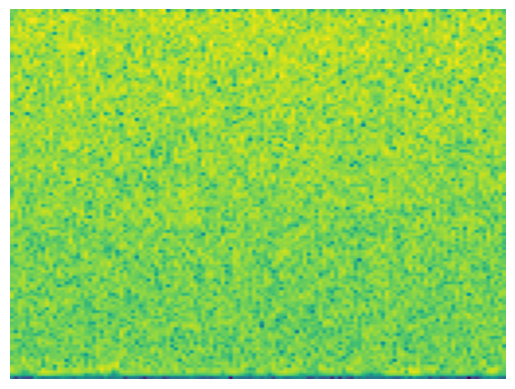

In [34]:
while l < 900:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 5000 + 6000 + 4500)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_2.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+6000+9500}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

20 26
wvfrm = 
l =  900  SNR =  12.22174287236761  m1 =  20  m2 =  26
11 11
wvfrm = 
l =  901  SNR =  7.486755522816656  m1 =  11  m2 =  11
22 30
wvfrm = 
l =  902  SNR =  10.920897958712196  m1 =  22  m2 =  30
14 26
wvfrm = 
l =  903  SNR =  12.305140269690943  m1 =  14  m2 =  26
15 23
wvfrm = 
l =  904  SNR =  9.477438322200959  m1 =  15  m2 =  23
21 18
wvfrm = 
l =  905  SNR =  9.490784547054108  m1 =  21  m2 =  18
23 17
wvfrm = 
l =  906  SNR =  8.306836429725317  m1 =  23  m2 =  17
10 23
wvfrm = 
l =  907  SNR =  9.63640371540462  m1 =  10  m2 =  23
12 13
wvfrm = 
l =  908  SNR =  5.7028274156858485  m1 =  12  m2 =  13
12 30
wvfrm = 
l =  909  SNR =  9.263577998714144  m1 =  12  m2 =  30
25 19
wvfrm = 
l =  910  SNR =  12.270874592530747  m1 =  25  m2 =  19
20 26
wvfrm = 
l =  911  SNR =  13.591151484863213  m1 =  20  m2 =  26
18 21
wvfrm = 
l =  912  SNR =  11.34233938620709  m1 =  18  m2 =  21
22 27
wvfrm = 
l =  913  SNR =  13.051967364567018  m1 =  22  m2 =  27
23 14
wvfrm = 


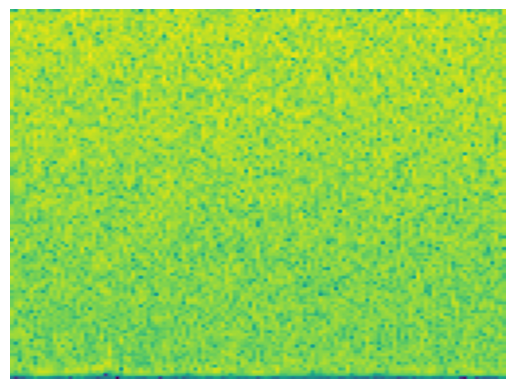

In [35]:
while l < 1000:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 5000 + 6000 + 4500)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_2.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+6000+9500}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

21 21
wvfrm = 
l =  1000  SNR =  11.114936510584087  m1 =  21  m2 =  21
10 11
wvfrm = 
l =  1001  SNR =  7.7540743001211005  m1 =  10  m2 =  11
29 11
wvfrm = 
l =  1002  SNR =  10.050453304221968  m1 =  29  m2 =  11
14 14
wvfrm = 
l =  1003  SNR =  9.265847423822553  m1 =  14  m2 =  14
27 18
wvfrm = 
l =  1004  SNR =  12.30323229495891  m1 =  27  m2 =  18
29 18
wvfrm = 
l =  1005  SNR =  12.615339397115086  m1 =  29  m2 =  18
11 24
wvfrm = 
l =  1006  SNR =  9.35492487509291  m1 =  11  m2 =  24
17 24
wvfrm = 
l =  1007  SNR =  10.603512145156369  m1 =  17  m2 =  24
24 12
wvfrm = 
l =  1008  SNR =  8.512006314375013  m1 =  24  m2 =  12
27 25
wvfrm = 
l =  1009  SNR =  14.098096053182893  m1 =  27  m2 =  25
11 16
wvfrm = 
l =  1010  SNR =  6.209796561204563  m1 =  11  m2 =  16
19 11
wvfrm = 
l =  1011  SNR =  7.480476615158633  m1 =  19  m2 =  11
27 17
wvfrm = 
l =  1012  SNR =  11.514404797628826  m1 =  27  m2 =  17
16 11
wvfrm = 
l =  1013  SNR =  8.004878458811188  m1 =  16  m2 =  11


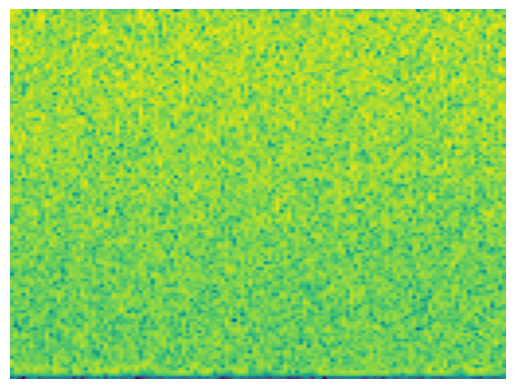

In [36]:
while l < 1100:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 5000 + 6000 + 4500)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_2.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+6000+9500}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

25 12
wvfrm = 
l =  1100  SNR =  8.592734294998072  m1 =  25  m2 =  12
10 25
wvfrm = 
l =  1101  SNR =  8.525393409784504  m1 =  10  m2 =  25
11 22
wvfrm = 
l =  1102  SNR =  10.784730912870295  m1 =  11  m2 =  22
13 12
wvfrm = 
l =  1103  SNR =  8.494614373447398  m1 =  13  m2 =  12
30 17
wvfrm = 
l =  1104  SNR =  12.870188362480054  m1 =  30  m2 =  17
18 25
wvfrm = 
l =  1105  SNR =  11.439045390127173  m1 =  18  m2 =  25
27 21
wvfrm = 
l =  1106  SNR =  12.626978882821469  m1 =  27  m2 =  21
30 10
wvfrm = 
l =  1107  SNR =  9.296367711506763  m1 =  30  m2 =  10
21 22
wvfrm = 
l =  1108  SNR =  13.289072046264588  m1 =  21  m2 =  22
15 24
wvfrm = 
l =  1109  SNR =  10.752926724813799  m1 =  15  m2 =  24
15 30
wvfrm = 
l =  1110  SNR =  10.995111508988854  m1 =  15  m2 =  30
10 28
wvfrm = 
l =  1111  SNR =  8.26696428337053  m1 =  10  m2 =  28
28 26
wvfrm = 
l =  1112  SNR =  13.745394632572026  m1 =  28  m2 =  26
24 14
wvfrm = 
l =  1113  SNR =  9.73897368786903  m1 =  24  m2 =  14


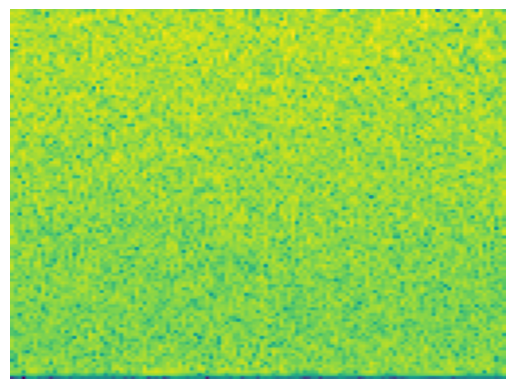

In [37]:
while l < 1200:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 5000 + 6000 + 4500)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_2.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+6000+9500}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

21 19
wvfrm = 
l =  1200  SNR =  10.659259495153012  m1 =  21  m2 =  19
20 10
wvfrm = 
l =  1201  SNR =  10.705285081176793  m1 =  20  m2 =  10
14 29
wvfrm = 
l =  1202  SNR =  9.906251924886208  m1 =  14  m2 =  29
11 21
wvfrm = 
l =  1203  SNR =  9.354779093492414  m1 =  11  m2 =  21
17 24
wvfrm = 
l =  1204  SNR =  10.982103206637507  m1 =  17  m2 =  24
13 20
wvfrm = 
l =  1205  SNR =  9.482190792507511  m1 =  13  m2 =  20
24 10
wvfrm = 
l =  1206  SNR =  9.582388823749772  m1 =  24  m2 =  10
18 13
wvfrm = 
l =  1207  SNR =  8.63146809247123  m1 =  18  m2 =  13
19 18
wvfrm = 
l =  1208  SNR =  10.799679772996232  m1 =  19  m2 =  18
21 29
wvfrm = 
l =  1209  SNR =  11.602746948054511  m1 =  21  m2 =  29
26 13
wvfrm = 
l =  1210  SNR =  9.17164012918421  m1 =  26  m2 =  13
30 24
wvfrm = 
l =  1211  SNR =  13.143642160614883  m1 =  30  m2 =  24
25 24
wvfrm = 
l =  1212  SNR =  12.586971409512856  m1 =  25  m2 =  24
22 11
wvfrm = 
l =  1213  SNR =  8.340846195988185  m1 =  22  m2 =  11
2

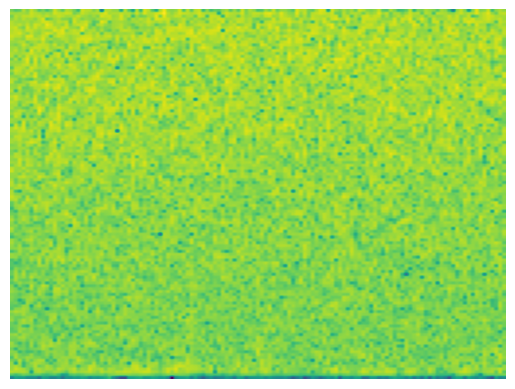

In [38]:
while l < 1300:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 5000 + 6000 + 4500)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_2.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+6000+9500}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

16 28
wvfrm = 
l =  1300  SNR =  9.176373413248232  m1 =  16  m2 =  28
13 23
wvfrm = 
l =  1301  SNR =  8.81253428933493  m1 =  13  m2 =  23
24 26
wvfrm = 
l =  1302  SNR =  11.10184280283502  m1 =  24  m2 =  26
16 15
wvfrm = 
l =  1303  SNR =  8.097313682328698  m1 =  16  m2 =  15
19 18
wvfrm = 
l =  1304  SNR =  9.126833019485561  m1 =  19  m2 =  18
29 21
wvfrm = 
l =  1305  SNR =  12.248334977361035  m1 =  29  m2 =  21
16 17
wvfrm = 
l =  1306  SNR =  9.748579004211903  m1 =  16  m2 =  17
19 13
wvfrm = 
l =  1307  SNR =  8.292911228921962  m1 =  19  m2 =  13
26 25
wvfrm = 
l =  1308  SNR =  12.176422699447134  m1 =  26  m2 =  25
24 21
wvfrm = 
l =  1309  SNR =  12.74458129295783  m1 =  24  m2 =  21
21 13
wvfrm = 
l =  1310  SNR =  10.66556783990251  m1 =  21  m2 =  13
30 13
wvfrm = 
l =  1311  SNR =  10.477112048175822  m1 =  30  m2 =  13
15 10
wvfrm = 
l =  1312  SNR =  7.08703860829455  m1 =  15  m2 =  10
16 21
wvfrm = 
l =  1313  SNR =  8.73016000451837  m1 =  16  m2 =  21
26 30


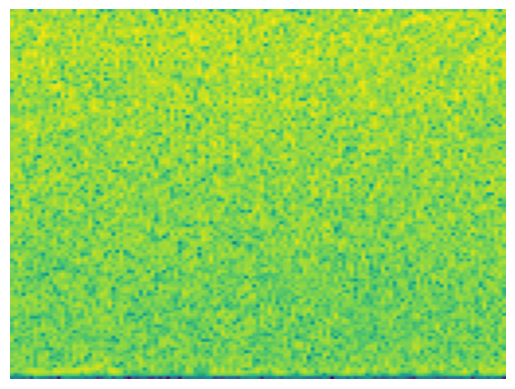

In [39]:
while l < 1400:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 5000 + 6000 + 4500)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_2.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+6000+9500}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

28 23
wvfrm = 
l =  1400  SNR =  12.177621205170066  m1 =  28  m2 =  23
22 15
wvfrm = 
l =  1401  SNR =  10.949658171140065  m1 =  22  m2 =  15
10 17
wvfrm = 
l =  1402  SNR =  9.130142701485584  m1 =  10  m2 =  17
11 25
wvfrm = 
l =  1403  SNR =  8.299335355347843  m1 =  11  m2 =  25
17 28
wvfrm = 
l =  1404  SNR =  11.101520354360249  m1 =  17  m2 =  28
23 11
wvfrm = 
l =  1405  SNR =  9.436448617515532  m1 =  23  m2 =  11
13 16
wvfrm = 
l =  1406  SNR =  9.646028224679307  m1 =  13  m2 =  16
17 11
wvfrm = 
l =  1407  SNR =  10.729031122268259  m1 =  17  m2 =  11
19 17
wvfrm = 
l =  1408  SNR =  10.647970226785596  m1 =  19  m2 =  17
14 14
wvfrm = 
l =  1409  SNR =  8.822640364949182  m1 =  14  m2 =  14
18 29
wvfrm = 
l =  1410  SNR =  11.144606419845974  m1 =  18  m2 =  29
22 10
wvfrm = 
l =  1411  SNR =  9.05035543941924  m1 =  22  m2 =  10
21 30
wvfrm = 
l =  1412  SNR =  13.361588737847134  m1 =  21  m2 =  30
14 30
wvfrm = 
l =  1413  SNR =  10.663481211476613  m1 =  14  m2 =  30

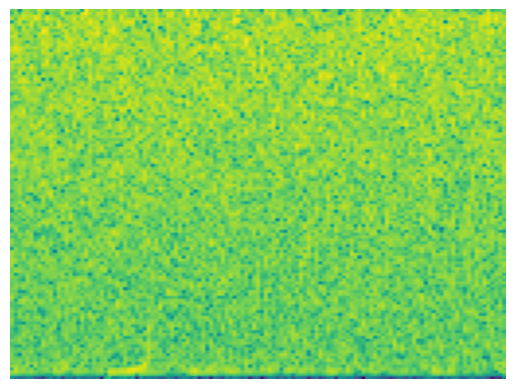

In [40]:
while l < 1500:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 5000 + 6000 + 4500)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_2.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+6000+9500}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

wavform generate random mass
scale wvfrm
add to noise
calc snr
make spectrograms
classify into folders
